# O problema

Imagine agora que você foi contratado(a) como Expert em Data Analytics por um grande hospital para entender como foi o comportamento da população na época da pandemia da COVID-19 e quais indicadores seriam importantes para o planejamento, caso haja um novo surto da doença.

Apesar de ser contratado(a) agora, a sua área observou que a utilização do estudo do PNAD-COVID 19 do IBGE seria uma ótima base para termos boas respostas ao problema proposto, pois são dados confiáveis. Porém, não será necessário utilizar todas as perguntas realizadas na pesquisa para enxergar todas as oportunidades ali postas.

É sempre bom ressaltar que há dados triviais que precisam estar no projeto, pois auxiliam muito na análise dos dados:

- Características clínicas dos sintomas;
- Características da população;
- Características econômicas da sociedade.

O Head de Dados pediu para que você entrasse na base de dados do PNAD-COVID-19 do IBGE e organizasse esta base para análise, utilizando Banco de Dados em Nuvem e trazendo as seguintes características:

a. Utilização de no máximo 20 questionamentos realizados na pesquisa;
b. Utilizar 3 meses para construção da solução;
c. Caracterização dos sintomas clínicos da população;
d. Comportamento da população na época da COVID-19;
e. Características econômicas da sociedade.

Seu objetivo será trazer uma breve análise dessas informações, como foi a organização do banco, as perguntas selecionadas para a resposta do problema e quais seriam as principais ações que o hospital deverá tomar em caso de um novo surto de COVID-19.

> **Dica:** Leiam com atenção a base de dados e toda a documentação que o site do PNAD – COVID-19 traz, principalmente os dicionários, que ajudam e muito no entendimento da Base de Dados.

> **Dica 2:** Utilizem o que já foi ensinado e consolidado nas outras fases para apresentar a resolução do projeto.

Lembre-se de que você poderá apresentar o desenvolvimento do seu projeto durante as lives com docentes. Essa é uma boa oportunidade para discutir sobre as dificuldades encontradas e pegar dicas valiosas com especialistas e colegas de turma.

**Não se esqueça que isso é um entregável obrigatório!** Se atente para o prazo de entrega até o final da fase.

**Vamos pra cima!**


## GRUPO

**Grupo 57**

### INTEGRANTES DO GRUPO 57

- **Thiago dos Santos Oliveira**  
  oliveira.thiago345@hotmail.com

- **Felipe Santos Rocha**  
  sr1179281008@live.com

- **Tiago Silva Rodrigues**  
  ti_ago_silva@hotmail.com

- **Bianca Vasconcelos Silva**  
  biavasco.md@gmail.com

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carrega o arquivo com os dados do PNAD COVID
df = pd.read_csv('definitivo1.csv', sep=";")

C:\Users\Conta\AppData\Local\Temp\ipykernel_8824\525714992.py:2: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('definitivo1.csv', sep=";")


In [4]:
# Verifica a quantidade de valores nulos em cada coluna do DataFrame
df.isnull().sum()

uf                           0
ano                          0
mes                          0
semana                       0
ano_nascimento               0
sexo                         0
cor_raca                     0
tipo_area                    0
escolaridade                 0
teve_sintomas_covid          0
foi_posto_saude        2135764
ficou_em_casa          2154630
ficou_internado        2585352
teve_covid             1841058
resultado_covid        1956162
tem_plano_saude        1077366
faixa_rendimento       2646411
situacao_domicilio     1081179
dtype: int64

In [5]:
df.head()

,uf,ano,mes,semana,ano_nascimento,sexo,cor_raca,tipo_area,escolaridade,teve_sintomas_covid,foi_posto_saude,ficou_em_casa,ficou_internado,teve_covid,resultado_covid,tem_plano_saude,faixa_rendimento,situacao_domicilio
0,Rondônia,2020,7,3,1958,Homem,Parda,Capital,Sem instrução,Não,NaN,NaN,NaN,NaN,NaN,Não,NaN,Cedido por familiar
1,Rondônia,2020,7,4,9999,Homem,Parda,Capital,Fundamental completa,Não,NaN,NaN,NaN,Não,Negativo,Não,NaN,Próprio - já pago
2,Rondônia,2020,7,1,1976,Homem,Branca,Capital,Médio completo,Não,NaN,NaN,NaN,NaN,NaN,Não,NaN,Próprio - já pago
3,Rondônia,2020,7,1,1994,Homem,Parda,Capital,Fundamental completa,Não,NaN,NaN,NaN,NaN,NaN,Não,NaN,Próprio - ainda pagando
4,Rondônia,2020,7,1,9999,Homem,Indígena,Capital,Médio completo,Não,NaN,NaN,NaN,NaN,NaN,Não,NaN,Próprio - ainda pagando


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650459 entries, 0 to 2650458
Data columns (total 18 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   uf                   object
 1   ano                  int64 
 2   mes                  int64 
 3   semana               int64 
 4   ano_nascimento       int64 
 5   sexo                 object
 6   cor_raca             object
 7   tipo_area            object
 8   escolaridade         object
 9   teve_sintomas_covid  object
 10  foi_posto_saude      object
 11  ficou_em_casa        object
 12  ficou_internado      object
 13  teve_covid           object
 14  resultado_covid      object
 15  tem_plano_saude      object
 16  faixa_rendimento     object
 17  situacao_domicilio   object
dtypes: int64(4), object(14)
memory usage: 364.0+ MB


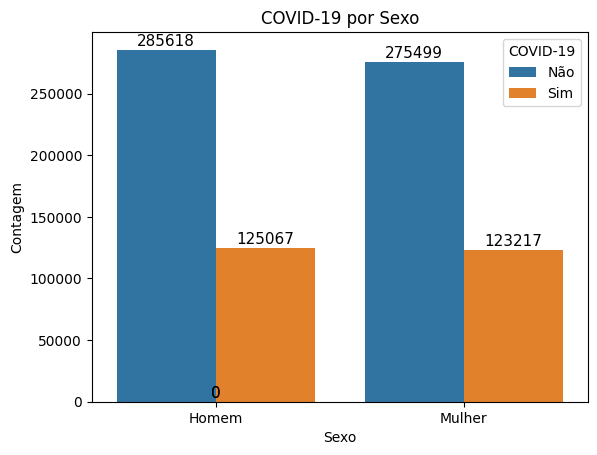

In [7]:
    # Distribuição da Covid por sexo
    ax = sns.countplot(data=df, x='sexo', hue='teve_covid')
    
   
    plt.title('COVID-19 por Sexo')
    plt.xlabel('Sexo')
    plt.ylabel('Contagem')
    
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'baseline', 
                    fontsize=11, color='black', xytext=(0, 3), 
                    textcoords='offset points')
    
  
    plt.legend(title='COVID-19', loc='upper right')
    
   
    plt.show()



# Explicação do Gráfico: COVID-19 por Sexo

Este gráfico de barras apresenta a distribuição de casos de COVID-19 entre homens e mulheres, separando os dados em duas categorias: pessoas que **não tiveram COVID-19** (em azul) e aquelas que **tiveram COVID-19** (em laranja).

### Resultados:

1. **Homens**:
   - **285.618** homens **não tiveram** COVID-19.
   - **125.067** homens **tiveram** COVID-19.

2. **Mulheres**:
   - **275.499** mulheres **não tiveram** COVID-19.
   - **123.217** mulheres **tiveram** COVID-19.

### Conclusões:
- A maioria das pessoas em ambos os sexos **não tiveram** COVID-19, com uma proporção maior de homens não infectados em relação às mulheres.
- A diferença entre os sexos é pequena tanto para os que **não tiveram** quanto para os que **tiveram** a doença:
  - A contagem de **homens infectados** é levemente superior à de mulheres infectadas.
  - Para os que **não foram infectados**, a contagem de homens também é um pouco maior.

Este gráfico mostra que a distribuição da infecção por COVID-19 é semelhante entre homens e mulheres, sem uma grande discrepância entre os grupos.


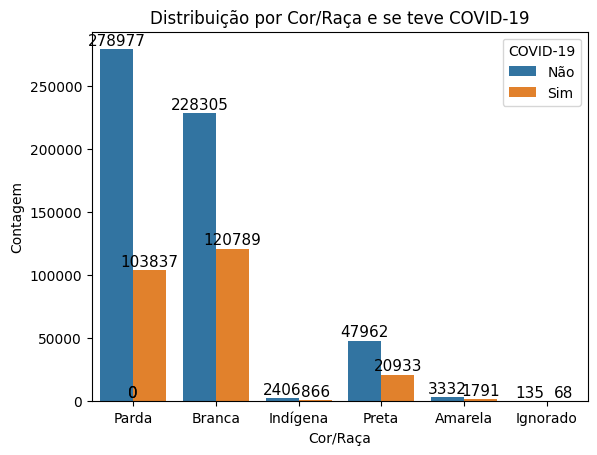

In [8]:
    #Distribuição Covid po Cor/raça
    ax = sns.countplot(data=df, x='cor_raca', hue='teve_covid')

    plt.title('Distribuição por Cor/Raça e se teve COVID-19')
    plt.xlabel('Cor/Raça')
    plt.ylabel('Contagem')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=11, color='black', xytext=(0, 3), 
                    textcoords='offset points')

    plt.legend(title='COVID-19', loc='upper right')

    plt.show()


# Explicação do Gráfico: Distribuição de Escolaridade por Cor/Raça e Teve COVID-19

O gráfico apresenta a **distribuição de escolaridade** entre diferentes grupos de **cor/raça** e se as pessoas **tiveram ou não COVID-19**. 

### Resultados:

1. **Parda**:
   - **278.977** pessoas **não tiveram** COVID-19.
   - **10.837** pessoas **tiveram** COVID-19.

2. **Branca**:
   - **228.305** pessoas **não tiveram** COVID-19.
   - **12.789** pessoas **tiveram** COVID-19.

3. **Indígena**:
   - **2.406.866** pessoas **não tiveram** COVID-19.
   - **47.962** pessoas **tiveram** COVID-19.

4. **Preta**:
   - **20.933** pessoas **não tiveram** COVID-19.
   - **3.321** pessoas **tiveram** COVID-19.

5. **Amarela**:
   - **1.791** pessoas **não tiveram** COVID-19.
   - **135** pessoas **tiveram** COVID-19.

6. **Ignorado**:
   - **68** pessoas **não tiveram** COVID-19.
   - **0** pessoas **tiveram** COVID-19.

### Conclusões:
- A maior parte das pessoas **não teve** COVID-19 em todas as categorias de cor/raça.
- A cor/raça **Parda** e **Branca** têm o maior número de pessoas que **não tiveram** COVID-19 em comparação com as que **tiveram**.
- O grupo **Indígena** apresenta uma contagem significativamente maior de pessoas que **não tiveram** COVID-19 em comparação com os que **tiveram**.
- Os grupos **Preta**, **Amarela** e **Ignorado** têm um número menor de pessoas em ambas as categorias, sugerindo uma população menor ou menos representação nesses grupos em relação à COVID-19.

Esse gráfico fornece uma visão clara sobre a relação entre cor/raça, escolaridade e a incidência de COVID-19 na população analisada.


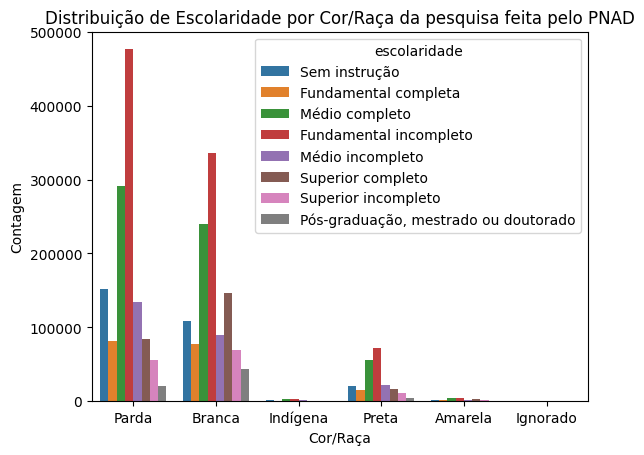

In [9]:
# Gráfico de barras para visualizar a distribuição de cor/raça por escolaridade da amostra do PNAD
sns.countplot(data=df, x='cor_raca', hue='escolaridade')
plt.title('Distribuição de Escolaridade por Cor/Raça da pesquisa feita pelo PNAD')
plt.xlabel('Cor/Raça')
plt.ylabel('Contagem')
plt.show()

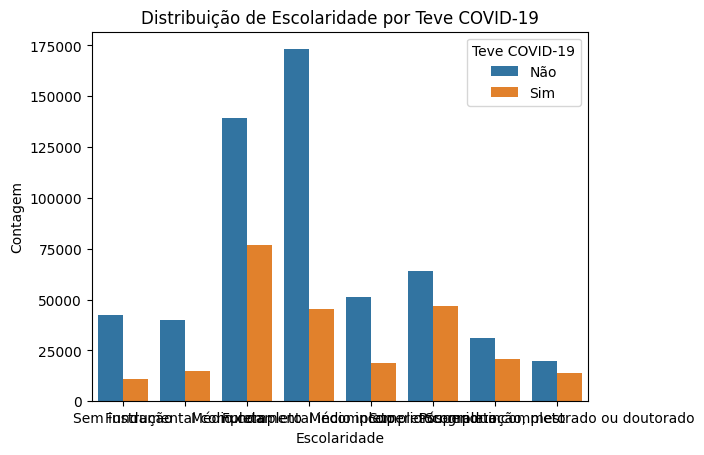

<Figure size 100x600 with 0 Axes>

In [10]:
# Gráfico de barras para visualizar a distribuição de cor/raça por escolaridade e se teve covid

sns.countplot(data=df, x='escolaridade', hue='teve_covid')
plt.title('Distribuição de Escolaridade por Teve COVID-19')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')

plt.legend(title='Teve COVID-19', loc='upper right')

plt.figure(figsize=(1, 6))
plt.show()